# Build a predictive maintenance model for a delivery company - Classification

In this project, we will build a model for a delivery company. The organization rarely fails, so the data will be unbalanced. We will need to build a predictive model.

<img src='https://www.appier.com/hubfs/Imported_Blog_Media/Predictive-Modeling-1.jpg' >

### Import Dataset

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('failure.csv')

### EDA and Data Visualization

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [5]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [6]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [7]:
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

df=df.drop(['date','device'],axis=1)

df['year']=df['year'].astype(str)
df['month']=df['month'].astype(str)
df['day']=df['day'].astype(str)

In [8]:
df.head()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,day
0,0,215630672,56,0,52,6,407438,0,0,7,2015,1,1
1,0,61370680,0,3,0,6,403174,0,0,0,2015,1,1
2,0,173295968,0,0,0,12,237394,0,0,0,2015,1,1
3,0,79694024,0,0,0,6,410186,0,0,0,2015,1,1
4,0,135970480,0,0,0,15,313173,0,0,3,2015,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   failure     124494 non-null  int64 
 1   attribute1  124494 non-null  int64 
 2   attribute2  124494 non-null  int64 
 3   attribute3  124494 non-null  int64 
 4   attribute4  124494 non-null  int64 
 5   attribute5  124494 non-null  int64 
 6   attribute6  124494 non-null  int64 
 7   attribute7  124494 non-null  int64 
 8   attribute8  124494 non-null  int64 
 9   attribute9  124494 non-null  int64 
 10  year        124494 non-null  object
 11  month       124494 non-null  object
 12  day         124494 non-null  object
dtypes: int64(10), object(3)
memory usage: 12.3+ MB


In [10]:
df.columns

Index(['failure', 'attribute1', 'attribute2', 'attribute3', 'attribute4',
       'attribute5', 'attribute6', 'attribute7', 'attribute8', 'attribute9',
       'year', 'month', 'day'],
      dtype='object')

In [11]:
df.corr(numeric_only=True)

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


<Axes: >

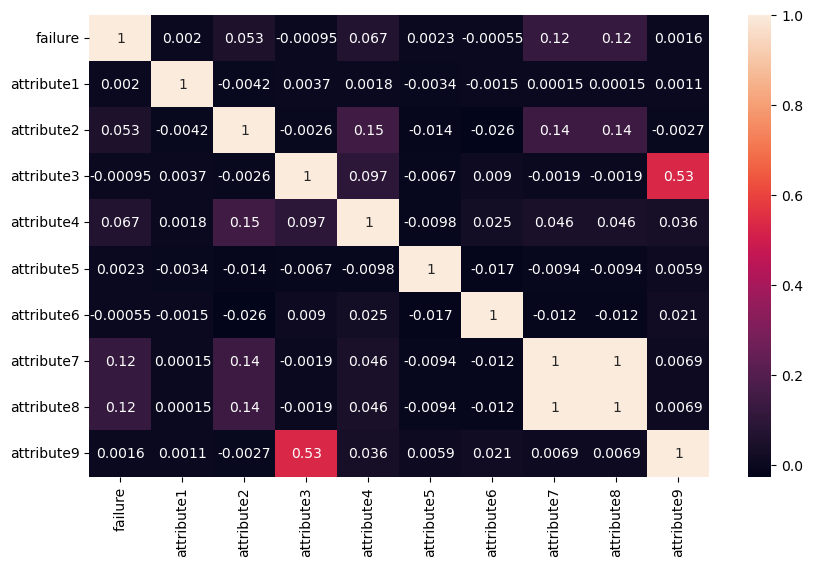

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

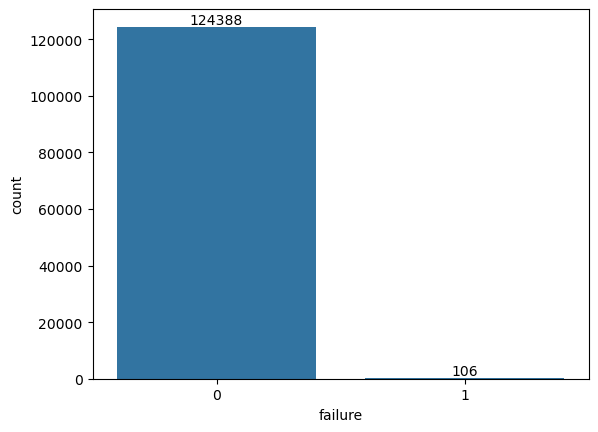

In [13]:
ax=sns.countplot(x='failure',data=df)
for container in ax.containers:
    ax.bar_label(container)

### Oversampling the Data

It is unbalanced data, so we will oversampling the data with SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
x=df.drop(['failure'],axis=1)
y=df['failure']

Before oversampling;

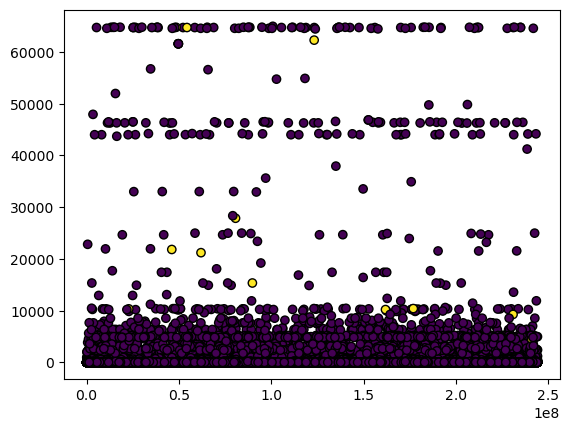

In [16]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], marker="o", c=y, edgecolor="k")

In [17]:
oversample = SMOTE()

In [18]:
x_smote, y_smote = oversample.fit_resample(x, y)

After oversampling;

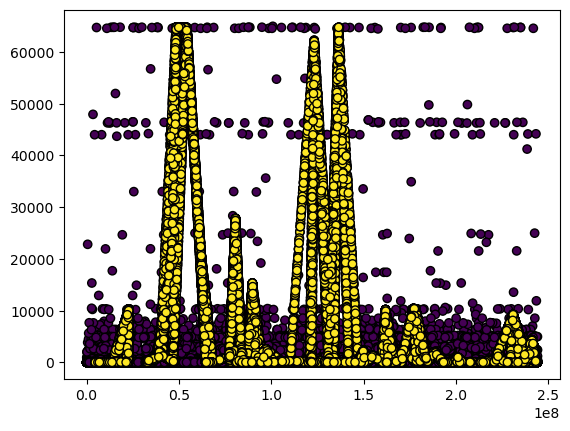

In [19]:
plt.scatter(x_smote.iloc[:, 0], x_smote.iloc[:, 1], marker="o", c=y_smote, edgecolor="k")

So we can get x=x_smote, y=y_smote

In [20]:
x=x_smote
y=y_smote

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42) #We split data %80 for train and %20 for test

In [23]:
g=GaussianNB()
b=BernoulliNB()
l=LogisticRegression()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
h=GradientBoostingClassifier()
k=KNeighborsClassifier()

We will use these libraries in order and see which one gives better results.

* GaussianNB

In [24]:
g.fit(x_train,y_train)

GaussianNB()

In [25]:
gtahmin=g.predict(x_test)

In [26]:
accuracy_score(gtahmin,y_test)

0.5811158453251869

In [27]:
confusion_matrix(gtahmin,y_test)

array([[24628, 20718],
       [  124,  4286]], dtype=int64)

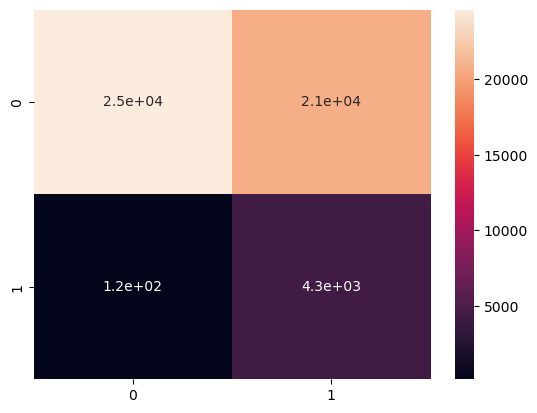

In [28]:
sns.heatmap(confusion_matrix(gtahmin,y_test), annot=True);

In [29]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

           0       0.99      0.54      0.70     45346
           1       0.17      0.97      0.29      4410

    accuracy                           0.58     49756
   macro avg       0.58      0.76      0.50     49756
weighted avg       0.92      0.58      0.67     49756



* BernoulliNB

In [30]:
b.fit(x_train,y_train)

BernoulliNB()

In [31]:
btahmin=b.predict(x_test)

In [32]:
accuracy_score(btahmin,y_test)

0.8876718385722325

In [33]:
confusion_matrix(btahmin,y_test)

array([[23933,  4770],
       [  819, 20234]], dtype=int64)

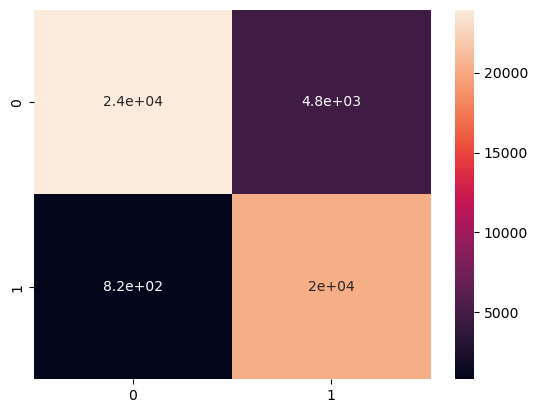

In [34]:
sns.heatmap(confusion_matrix(btahmin,y_test), annot=True);

In [35]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90     28703
           1       0.81      0.96      0.88     21053

    accuracy                           0.89     49756
   macro avg       0.89      0.90      0.89     49756
weighted avg       0.90      0.89      0.89     49756



* LogisticRegression

In [36]:
l.fit(x_train, y_train)

C:\Users\polu5\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
ltahmin=l.predict(x_test)

In [38]:
accuracy_score(ltahmin,y_test)

0.7106278639762039

In [39]:
confusion_matrix(ltahmin,y_test)

array([[24102, 13748],
       [  650, 11256]], dtype=int64)

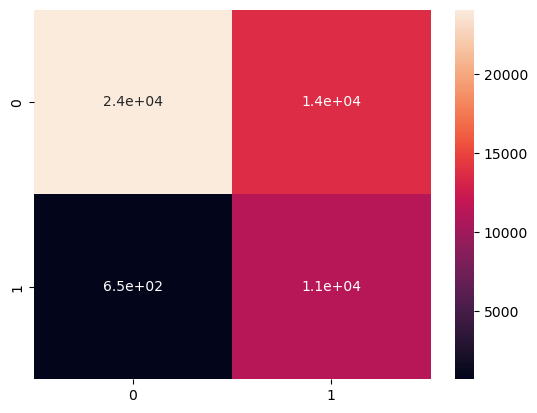

In [40]:
sns.heatmap(confusion_matrix(ltahmin,y_test), annot=True);

In [41]:
print(classification_report(ltahmin,y_test))

              precision    recall  f1-score   support

           0       0.97      0.64      0.77     37850
           1       0.45      0.95      0.61     11906

    accuracy                           0.71     49756
   macro avg       0.71      0.79      0.69     49756
weighted avg       0.85      0.71      0.73     49756



* DecisionTreeClassifier

In [42]:
d.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
dtahmin=d.predict(x_test)

In [44]:
accuracy_score(dtahmin,y_test)

0.9983720556314817

In [45]:
confusion_matrix(dtahmin,y_test)

array([[24692,    21],
       [   60, 24983]], dtype=int64)

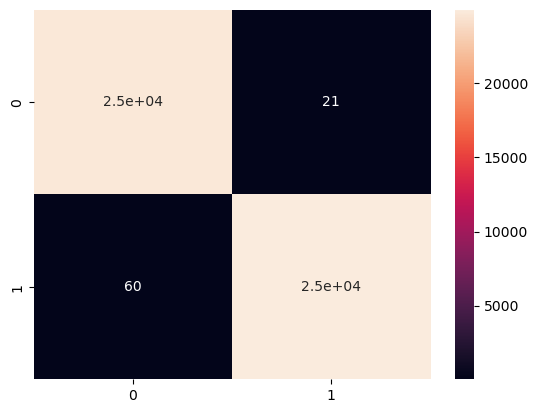

In [46]:
sns.heatmap(confusion_matrix(dtahmin,y_test), annot=True);

In [47]:
print(classification_report(dtahmin,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24713
           1       1.00      1.00      1.00     25043

    accuracy                           1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756



* RandomForestClassifier

In [48]:
r.fit(x_train, y_train)

RandomForestClassifier()

In [49]:
rtahmin=r.predict(x_test)

In [50]:
accuracy_score(rtahmin,y_test)

0.9997186268992684

In [51]:
confusion_matrix(rtahmin,y_test)

array([[24742,     4],
       [   10, 25000]], dtype=int64)

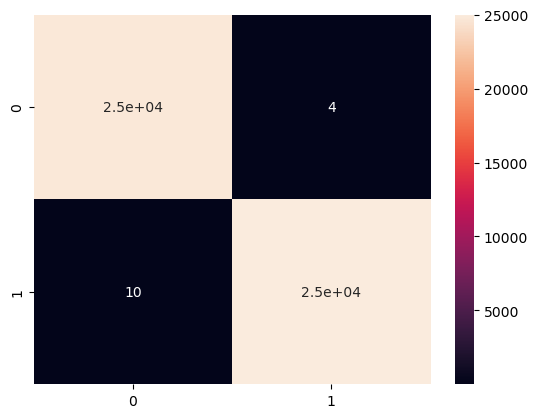

In [52]:
sns.heatmap(confusion_matrix(rtahmin,y_test), annot=True);

In [53]:
print(classification_report(rtahmin,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24746
           1       1.00      1.00      1.00     25010

    accuracy                           1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756



*  GradientBoostingClassifier

In [54]:
h.fit(x_train, y_train)

GradientBoostingClassifier()

In [55]:
htahmin=h.predict(x_test)

In [56]:
accuracy_score(htahmin,y_test)

0.9761435806736876

In [57]:
confusion_matrix(htahmin,y_test)

array([[24168,   603],
       [  584, 24401]], dtype=int64)

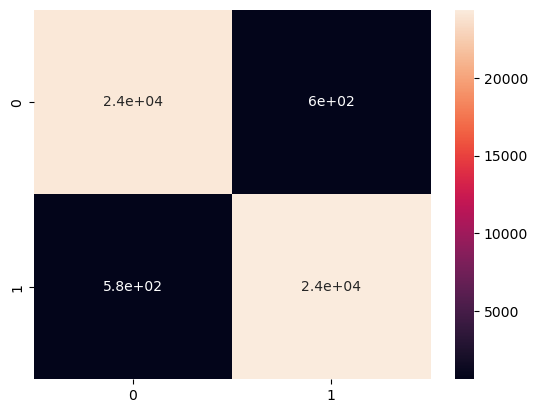

In [58]:
sns.heatmap(confusion_matrix(htahmin,y_test), annot=True);

In [59]:
print(classification_report(htahmin,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     24771
           1       0.98      0.98      0.98     24985

    accuracy                           0.98     49756
   macro avg       0.98      0.98      0.98     49756
weighted avg       0.98      0.98      0.98     49756



* KNeighborsClassifier

In [60]:
k.fit(x_train, y_train)

KNeighborsClassifier()

In [61]:
ktahmin=k.predict(x_test)

In [62]:
accuracy_score(ktahmin,y_test)

0.8519173567006995

In [63]:
confusion_matrix(ktahmin,y_test)

array([[19769,  2385],
       [ 4983, 22619]], dtype=int64)

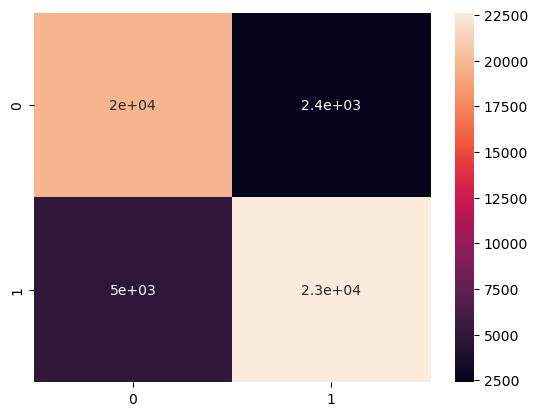

In [64]:
sns.heatmap(confusion_matrix(ktahmin,y_test), annot=True);

In [65]:
print(classification_report(ktahmin,y_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     22154
           1       0.90      0.82      0.86     27602

    accuracy                           0.85     49756
   macro avg       0.85      0.86      0.85     49756
weighted avg       0.86      0.85      0.85     49756



### Results

We can say that the best result we have is given us by RandomForestClassifier. So we will use this model. Finally let's show the feature importance. Which column is more influential in our decision?

In [66]:
r.feature_importances_

array([0.05997001, 0.25133874, 0.00721318, 0.22989221, 0.03070385,
       0.04979091, 0.10631138, 0.13993724, 0.00977604, 0.        ,
       0.0681952 , 0.04687126])

In [67]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':r.feature_importances_})

In [68]:
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

In [69]:
feature_importance

,Feature,Coefs
1,attribute2,0.251339
3,attribute4,0.229892
7,attribute8,0.139937
6,attribute7,0.106311
10,month,0.068195
0,attribute1,0.059970
5,attribute6,0.049791
11,day,0.046871
4,attribute5,0.030704
8,attribute9,0.009776


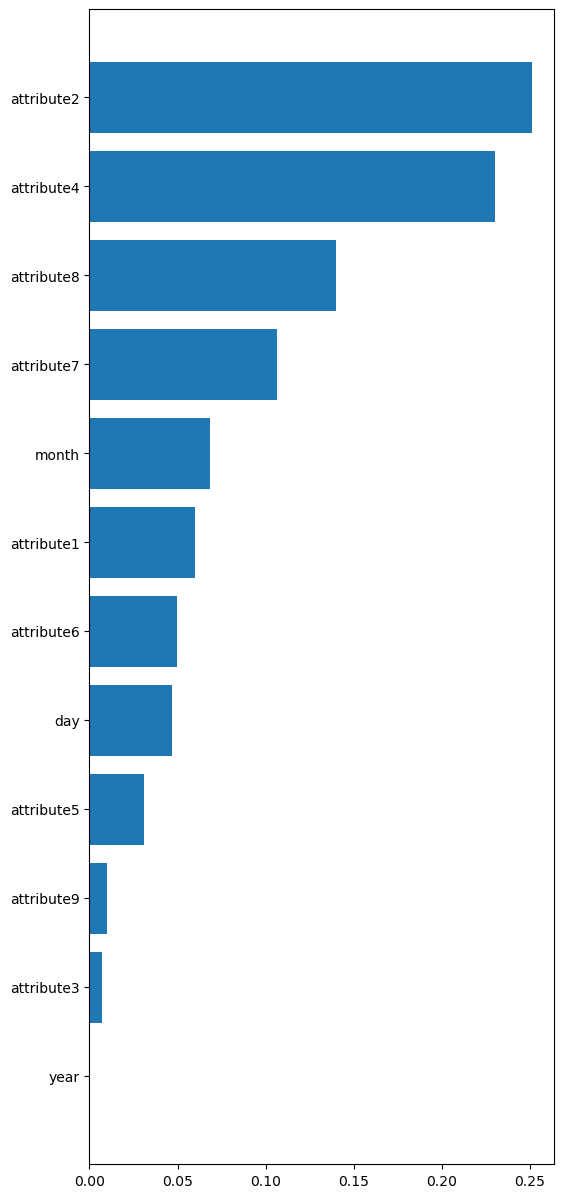

In [70]:
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'],feature_importance['Coefs']);
plt.gca().invert_yaxis()

### Conclusion

We read our dataset using the pandas library. Then, we examined the data with exploratory data analysis. During this examination, we noticed an imbalance in the data. The number of rows where the failure column had a value of 1 was very low. Therefore, if we had built our model with the data in this state, the model wouldn’t have learned the features with a failure value of 1 properly, and we would have faced the risk of overfitting on the failure value of 0. To solve this issue, we used the SMOTE library to oversample the x and y values, generating new rows where failure equals 1, thus obtaining a balanced dataset. Then we divided the data into 80% train and 20% test. We trained models separately using the GaussianNB, BernoulliNB, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, and KNeighborsClassifier machine learning libraries, respectively. The RandomForestClassifier made the best prediction with an accuracy score of 83%. We also identified the most important factors in our decision-making process.